# A jupyter-notebook file for plotting the PSFs

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import operator

### Define functions for calculating radial profile of a PSF and a Gaussian function
The functions are not optimized for a rapid calculation

In [4]:
def radprof_psf(psf_image, pix_scale, rad_min, rad_max):
    dim_y = psf_image.shape[0]
    dim_x = psf_image.shape[1]
    x_cent = (dim_x-1)/2
    y_cent = (dim_y-1)/2

    pix_x = []
    pix_y = []
    pix_val = []
    idx_count = 0
    for yy in range(0,dim_y):
        for xx in range(0,dim_x):
            pix_x.append(int(xx))
            pix_y.append(int(yy))
            pix_val.append(psf_image[int(yy)][int(xx)])
            idx_count = idx_count + 1
    npixs = idx_count

    idx, max_val = max(enumerate(pix_val), key=operator.itemgetter(1))
    x_bright = pix_x[int(idx)]
    y_bright = pix_y[int(idx)]

    arcsec_per_pix = pix_scale

    pix_rad = []
    for pp in range(0,npixs):
        x_norm = pix_x[int(pp)]-x_cent
        y_norm = pix_y[int(pp)]-y_cent
        radius = math.sqrt(x_norm*x_norm + y_norm*y_norm)
        if pix_x[int(pp)]<=x_cent:
            radius = -1.0*radius
        pix_rad.append(radius*arcsec_per_pix)
        
    ## cut based on the desired radius range:
    npoints0 = len(pix_rad)
    cut_pix_rad = []
    cut_pix_val = []
    for ii in range(0,npoints0):
        if rad_min<=pix_rad[int(ii)]<=rad_max:
            cut_pix_rad.append(pix_rad[int(ii)])
            cut_pix_val.append(pix_val[int(ii)])
        
    ### order the radius from smallest to highest:
    temp_pix_rad = cut_pix_rad
    temp_pix_val = cut_pix_val
    npoints = len(temp_pix_rad)
    sorted_pix_rad = np.zeros(npoints)
    sorted_pix_val = np.zeros(npoints)
    for ii in range(0,npoints):
        idx, min_val = min(enumerate(temp_pix_rad), key=operator.itemgetter(1))
        sorted_pix_rad[int(ii)] = temp_pix_rad[int(idx)]
        sorted_pix_val[int(ii)] = temp_pix_val[int(idx)]
        del temp_pix_rad[int(idx)]
        del temp_pix_val[int(idx)]
    
    return (sorted_pix_rad,sorted_pix_val)

def gaussian1D(x,mean,fwhm):
    sigma = fwhm/2.355
    temp0 = -0.5*(x-mean)*(x-mean)/sigma/sigma
    y = np.exp(temp0)/sigma/math.sqrt(2.0*math.pi)
    return y

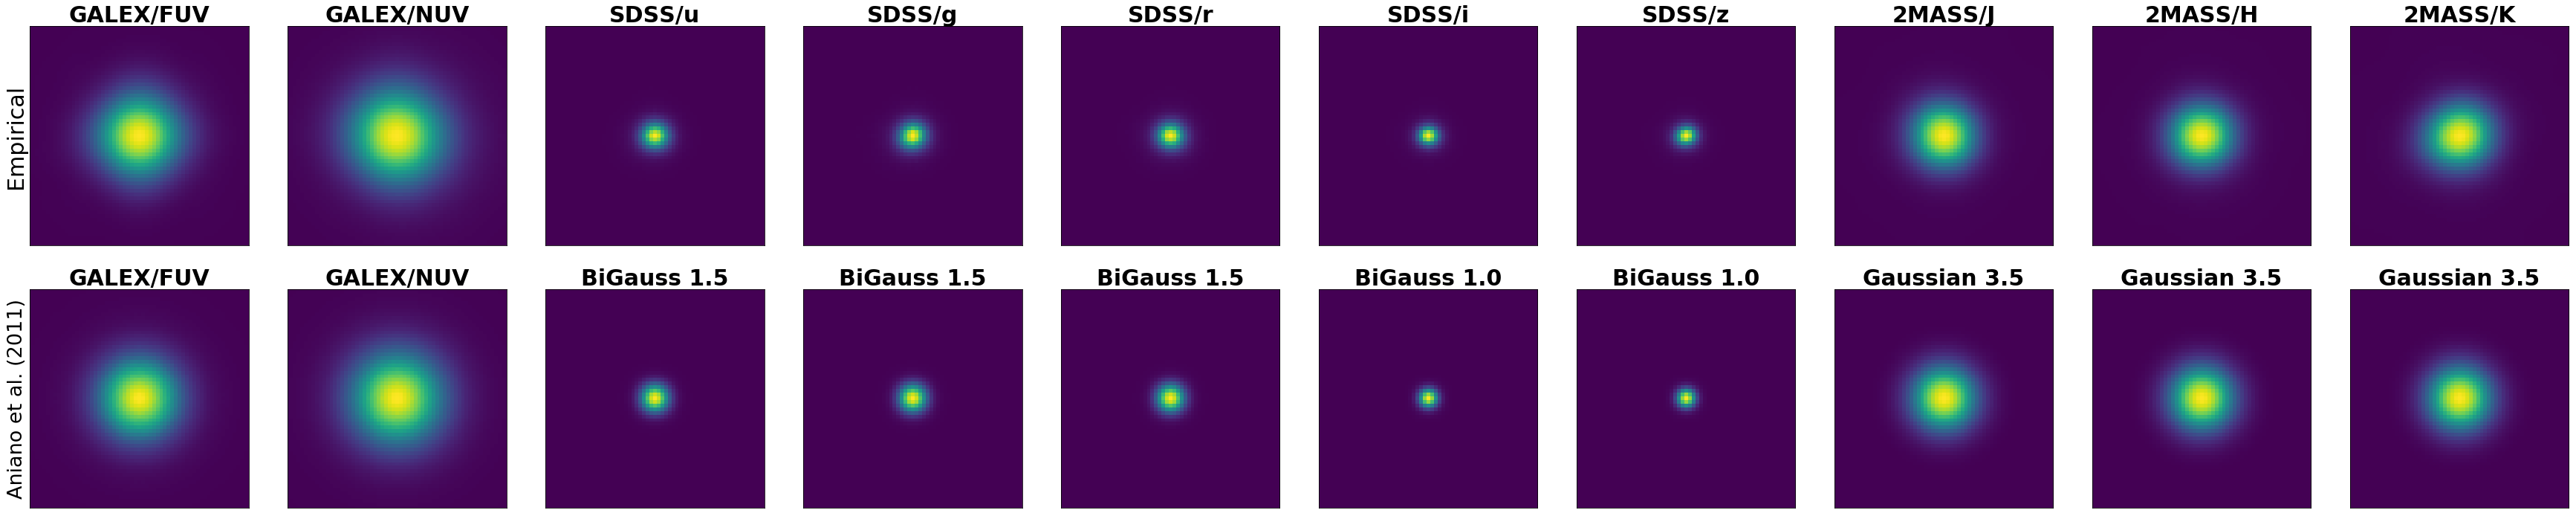

In [8]:

fig1 = plt.figure(figsize=(50,10))

### Empirical PSF: GALEX/FUV:
f1 = fig1.add_subplot(2, 10, 1)
file_name = "psf_emp_galex_fuv.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("GALEX/FUV", fontsize=30, fontweight='bold')
plt.ylabel("Empirical", fontsize=30)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: GALEX/NUV:
f1 = fig1.add_subplot(2, 10, 2)
file_name = "psf_emp_galex_nuv.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("GALEX/NUV", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: SDSS/u:
f1 = fig1.add_subplot(2, 10, 3)
file_name = "psf_emp_sdss_u.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("SDSS/u", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: SDSS/g:
f1 = fig1.add_subplot(2, 10, 4)
file_name = "psf_emp_sdss_g.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("SDSS/g", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: SDSS/r:
f1 = fig1.add_subplot(2, 10, 5)
file_name = "psf_emp_sdss_r.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("SDSS/r", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: SDSS/i:
f1 = fig1.add_subplot(2, 10, 6)
file_name = "psf_emp_sdss_i.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("SDSS/i", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: SDSS/z:
f1 = fig1.add_subplot(2, 10, 7)
file_name = "psf_emp_sdss_z.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("SDSS/z", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: 2MASS/J:
f1 = fig1.add_subplot(2, 10, 8)
file_name = "psf_emp_2mass_j.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("2MASS/J", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: 2MASS/H:
f1 = fig1.add_subplot(2, 10, 9)
file_name = "psf_emp_2mass_h.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("2MASS/H", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Empirical PSF: 2MASS/K:
f1 = fig1.add_subplot(2, 10, 10)
file_name = "psf_emp_2mass_k.fits.gz"
hdu = fits.open(file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("2MASS/K", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

#################################################

### Aniano+2011 PSF: GALEX/FUV:
f1 = fig1.add_subplot(2, 10, 11)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Corrected_GALEX_FUV_added_wing.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("GALEX/FUV", fontsize=30, fontweight='bold')
plt.ylabel("Aniano et al. (2011)", fontsize=27)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: GALEX/NUV:
f1 = fig1.add_subplot(2, 10, 12)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Corrected_GALEX_NUV_added_wing.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("GALEX/NUV", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: BiGauss 1.5"
f1 = fig1.add_subplot(2, 10, 13)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("BiGauss 1.5", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: BiGauss 1.5"
f1 = fig1.add_subplot(2, 10, 14)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("BiGauss 1.5", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: BiGauss 1.5"
f1 = fig1.add_subplot(2, 10, 15)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("BiGauss 1.5", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: BiGauss 1.0"
f1 = fig1.add_subplot(2, 10, 16)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.0.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("BiGauss 1.0", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: BiGauss 1.0"
f1 = fig1.add_subplot(2, 10, 17)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.0.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("BiGauss 1.0", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: Gauss 3.5"
f1 = fig1.add_subplot(2, 10, 18)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_Gauss_03.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("Gaussian 3.5", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: Gauss 3.5"
f1 = fig1.add_subplot(2, 10, 19)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_Gauss_03.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("Gaussian 3.5", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

### Aniano+2011 PSF: Gauss 3.5"
f1 = fig1.add_subplot(2, 10, 20)
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_Gauss_03.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image = hdu[0].data
hdu.close()
dim_x = psf_image.shape[1]
x_cent = (dim_x-1)/2
plt.title("Gaussian 3.5", fontsize=30, fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.setp(f1.get_yticklabels(), fontsize=8)
plt.setp(f1.get_xticklabels(), fontsize=8)
plt.xlim(x_cent-30,x_cent+30)
plt.ylim(x_cent-30,x_cent+30)
plt.imshow(psf_image, origin='lower', cmap='viridis')

plt.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.95, hspace=0.2, wspace=0.04)

plt.savefig("compare_PSFs_emp_aniano11.png")

In [ ]:
#=> GALEX/FUV:
file_name = "psf_emp_galex_fuv.fits.gz"
hdu = fits.open(file_name)
psf_image10 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Corrected_GALEX_FUV_added_wing.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image11 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad10,pix_val10 = radprof_psf(psf_image10, pix_scale, -10.0, 10.0)
pix_scale = 0.25
pix_rad11,pix_val11 = radprof_psf(psf_image11, pix_scale, -10.0, 10.0)

#=> GALEX/NUV:
file_name = "psf_emp_galex_nuv.fits.gz"
hdu = fits.open(file_name)
psf_image20 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Corrected_GALEX_NUV_added_wing.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image21 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad20,pix_val20 = radprof_psf(psf_image20, pix_scale, -10.0, 10.0)
pix_scale = 0.25
pix_rad21,pix_val21 = radprof_psf(psf_image21, pix_scale, -10.0, 10.0)

#=> SDSS/u:
file_name = "psf_emp_sdss_u.fits.gz"
hdu = fits.open(file_name)
psf_image30 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image31 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad30,pix_val30 = radprof_psf(psf_image30, pix_scale, -5.0, 5.0)
pix_scale = 0.25
pix_rad31,pix_val31 = radprof_psf(psf_image31, pix_scale, -5.0, 5.0)

#=> SDSS/g:
file_name = "psf_emp_sdss_g.fits.gz"
hdu = fits.open(file_name)
psf_image40 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image41 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad40,pix_val40 = radprof_psf(psf_image40, pix_scale, -5.0, 5.0)
pix_scale = 0.25
pix_rad41,pix_val41 = radprof_psf(psf_image41, pix_scale, -5.0, 5.0)

#=> SDSS/r:
file_name = "psf_emp_sdss_r.fits.gz"
hdu = fits.open(file_name)
psf_image50 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image51 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad50,pix_val50 = radprof_psf(psf_image50, pix_scale, -5.0, 5.0)
pix_scale = 0.25
pix_rad51,pix_val51 = radprof_psf(psf_image51, pix_scale, -5.0, 5.0)

#=> SDSS/i:
file_name = "psf_emp_sdss_i.fits.gz"
hdu = fits.open(file_name)
psf_image60 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.0.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image61 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad60,pix_val60 = radprof_psf(psf_image60, pix_scale, -5.0, 5.0)
pix_scale = 0.25
pix_rad61,pix_val61 = radprof_psf(psf_image61, pix_scale, -5.0, 5.0)

#=> SDSS/z:
file_name = "psf_emp_sdss_z.fits.gz"
hdu = fits.open(file_name)
psf_image70 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_BiGauss_01.0.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image71 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad70,pix_val70 = radprof_psf(psf_image70, pix_scale, -5.0, 5.0)
pix_scale = 0.25
pix_rad71,pix_val71 = radprof_psf(psf_image71, pix_scale, -5.0, 5.0)

#=> 2MASS/J:
file_name = "psf_emp_2mass_j.fits.gz"
hdu = fits.open(file_name)
psf_image80 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_Gauss_03.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image81 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad80,pix_val80 = radprof_psf(psf_image80, pix_scale, -8.0, 8.0)
pix_scale = 0.25
pix_rad81,pix_val81 = radprof_psf(psf_image81, pix_scale, -8.0, 8.0)

#=> 2MASS/H:
file_name = "psf_emp_2mass_h.fits.gz"
hdu = fits.open(file_name)
psf_image90 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_Gauss_03.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image91 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad90,pix_val90 = radprof_psf(psf_image90, pix_scale, -8.0, 8.0)
pix_scale = 0.25
pix_rad91,pix_val91 = radprof_psf(psf_image91, pix_scale, -8.0, 8.0)

#=> 2MASS/K:
file_name = "psf_emp_2mass_k.fits.gz"
hdu = fits.open(file_name)
psf_image100 = hdu[0].data
hdu.close()
dir_file = "https://www.astro.princeton.edu/~ganiano/Kernels/Ker_2018/PSF_FITS_Files/"
file_name = "PSF_Original_Gauss_03.5.fits.gz"
hdu = fits.open(dir_file+file_name)
psf_image101 = hdu[0].data
hdu.close()
pix_scale = 0.25
pix_rad100,pix_val100 = radprof_psf(psf_image100, pix_scale, -8.0, 8.0)
pix_scale = 0.25
pix_rad101,pix_val101 = radprof_psf(psf_image101, pix_scale, -8.0, 8.0)


NameError: name 'pix_rad80' is not defined

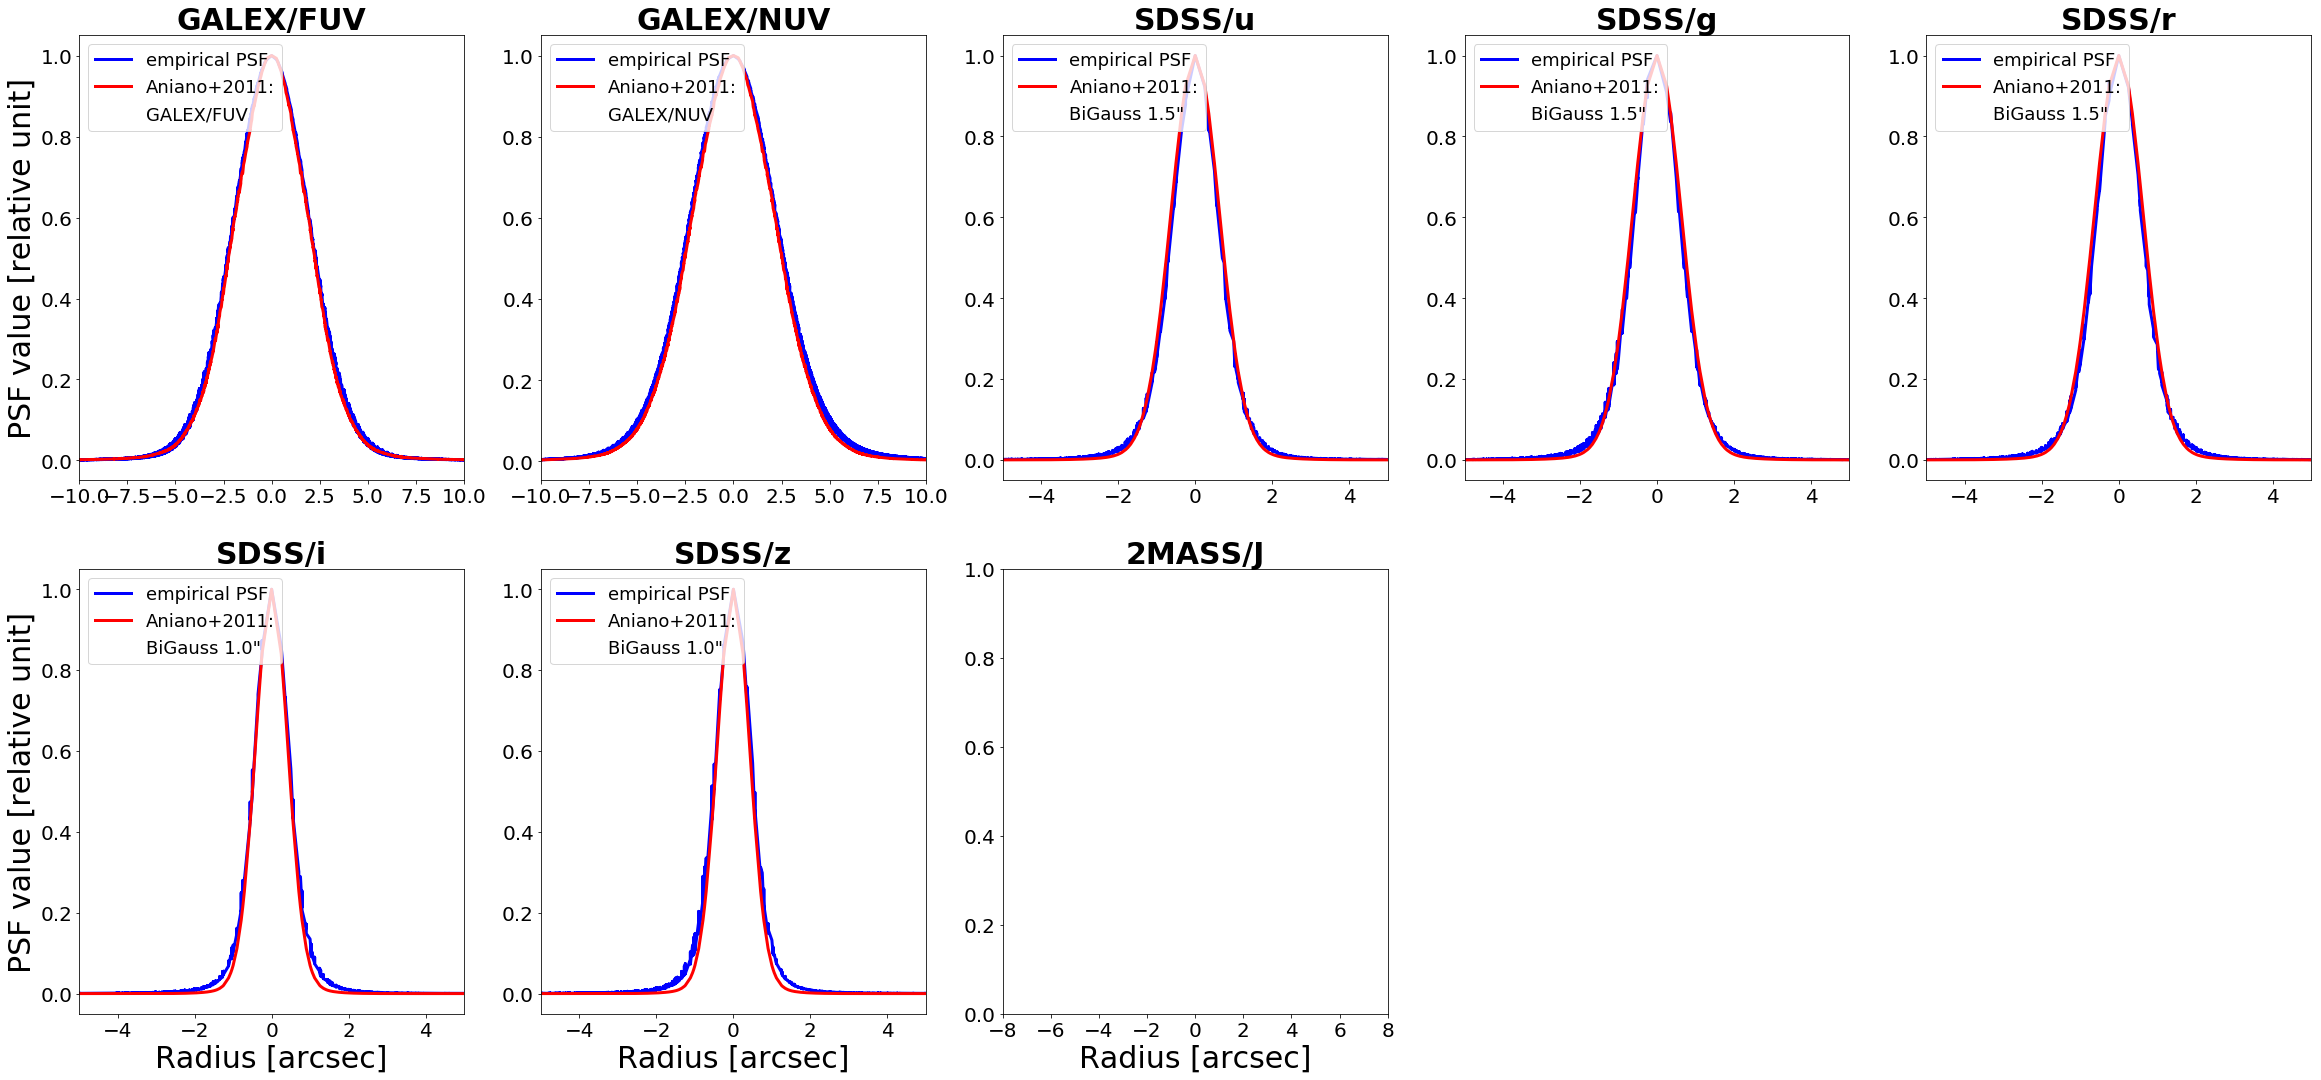

In [10]:
fig1 = plt.figure(figsize=(40,18))

#=> GALEX/FUV:
f1 = fig1.add_subplot(2, 5, 1)
plt.title("GALEX/FUV", fontsize=30, fontweight='bold')
plt.xlim(-10.0,10.0)
#plt.xlabel("Radius [arcsec]", fontsize=25)
plt.ylabel("PSF value [relative unit]", fontsize=30)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad10,pix_val10,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad11,pix_val11,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad11+100,pix_val11,lw=3,color='white',label='GALEX/FUV')
plt.legend(loc=2, fontsize=18)

#=> GALEX/NUV:
f1 = fig1.add_subplot(2, 5, 2)
plt.title("GALEX/NUV", fontsize=30, fontweight='bold')
plt.xlim(-10.0,10.0)
#plt.xlabel("Radius [arcsec]", fontsize=20)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad20,pix_val20,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad21,pix_val21,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad21+100,pix_val21,lw=3,color='white',label='GALEX/NUV')
plt.legend(loc=2, fontsize=18)

#=> SDSS/u:
f1 = fig1.add_subplot(2, 5, 3)
plt.title("SDSS/u", fontsize=30, fontweight='bold')
plt.xlim(-5.0,5.0)
#plt.xlabel("Radius [arcsec]", fontsize=20)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad30,pix_val30,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad31,pix_val31,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad31+100,pix_val31,lw=3,color='white',label='BiGauss 1.5"')
plt.legend(loc=2, fontsize=18)

#=> SDSS/g:
f1 = fig1.add_subplot(2, 5, 4)
plt.title("SDSS/g", fontsize=30, fontweight='bold')
plt.xlim(-5.0,5.0)
#plt.xlabel("Radius [arcsec]", fontsize=20)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad40,pix_val40,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad41,pix_val41,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad41+100,pix_val41,lw=3,color='white',label='BiGauss 1.5"')
plt.legend(loc=2, fontsize=18)

#=> SDSS/r:
f1 = fig1.add_subplot(2, 5, 5)
plt.title("SDSS/r", fontsize=30, fontweight='bold')
plt.xlim(-5.0,5.0)
#plt.xlabel("Radius [arcsec]", fontsize=20)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad50,pix_val50,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad51,pix_val51,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad51+100,pix_val51,lw=3,color='white',label='BiGauss 1.5"')
plt.legend(loc=2, fontsize=18)

#=> SDSS/i:
f1 = fig1.add_subplot(2, 5, 6)
plt.title("SDSS/i", fontsize=30, fontweight='bold')
plt.xlim(-5.0,5.0)
plt.xlabel("Radius [arcsec]", fontsize=30)
plt.ylabel("PSF value [relative unit]", fontsize=30)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad60,pix_val60,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad61,pix_val61,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad61+100,pix_val61,lw=3,color='white',label='BiGauss 1.0"')
plt.legend(loc=2, fontsize=18)

#=> SDSS/z:
f1 = fig1.add_subplot(2, 5, 7)
plt.title("SDSS/z", fontsize=30, fontweight='bold')
plt.xlim(-5.0,5.0)
plt.xlabel("Radius [arcsec]", fontsize=30)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad70,pix_val70,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad71,pix_val71,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad71+100,pix_val71,lw=3,color='white',label='BiGauss 1.0"')
plt.legend(loc=2, fontsize=18)

#=> 2MASS/J:
f1 = fig1.add_subplot(2, 5, 8)
plt.title("2MASS/J", fontsize=30, fontweight='bold')
plt.xlim(-8.0,8.0)
plt.xlabel("Radius [arcsec]", fontsize=30)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad80,pix_val80,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad81,pix_val81,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad81+100,pix_val81,lw=3,color='white',label='Gaussian 3.5"')
plt.legend(loc=2, fontsize=18)

#=> 2MASS/H:
f1 = fig1.add_subplot(2, 5, 9)
plt.title("2MASS/H", fontsize=30, fontweight='bold')
plt.xlim(-8.0,8.0)
plt.xlabel("Radius [arcsec]", fontsize=30)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad90,pix_val90,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad91,pix_val91,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad91+100,pix_val91,lw=3,color='white',label='Gaussian 3.5"')
plt.legend(loc=2, fontsize=18)

#=> 2MASS/K:
f1 = fig1.add_subplot(2, 5, 10)
plt.title("2MASS/K", fontsize=30, fontweight='bold')
plt.xlim(-8.0,8.0)
plt.xlabel("Radius [arcsec]", fontsize=30)
#plt.ylabel("PSF value [relative unit]", fontsize=20)
plt.setp(f1.get_yticklabels(), fontsize=20)
plt.setp(f1.get_xticklabels(), fontsize=20)
plt.plot(pix_rad100,pix_val100,lw=3,color='blue',label='empirical PSF')
plt.plot(pix_rad101,pix_val101,lw=3,color='red',label='Aniano+2011:')
plt.plot(pix_rad101+100,pix_val101,lw=3,color='white',label='Gaussian 3.5"')
plt.legend(loc=2, fontsize=18)

plt.subplots_adjust(left=0.05, right=0.98, bottom=0.1, top=0.95, hspace=0.2, wspace=0.15)

#plt.savefig("compare_PSFs_profiles_emp_aniano11.png")